<a href="https://colab.research.google.com/github/SnehaDharne/LearningAnalytics/blob/main/OULAD_without_class_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/dataset for notebooks/imputed_data.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path)

In [ ]:
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length
0,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,...,-159.0,1000.0,1752.0,18.0,0.0,78.0,TMA,19.0,10.0,268.0
1,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,...,-159.0,1000.0,1753.0,53.0,0.0,85.0,TMA,54.0,20.0,268.0
2,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,...,-159.0,1000.0,1754.0,115.0,0.0,80.0,TMA,117.0,20.0,268.0
3,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,...,-159.0,1000.0,1755.0,164.0,0.0,85.0,TMA,166.0,20.0,268.0
4,AAA,2013J,11391.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0.0,240.0,...,-159.0,1000.0,1756.0,212.0,0.0,82.0,TMA,215.0,30.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180657,GGG,2014J,2684003.0,F,Yorkshire Region,HE Qualification,50-60%,35-55,0.0,30.0,...,-28.0,1000.0,37437.0,169.0,0.0,60.0,TMA,173.0,0.0,269.0
180658,GGG,2014J,2684003.0,F,Yorkshire Region,HE Qualification,50-60%,35-55,0.0,30.0,...,-28.0,1000.0,37438.0,73.0,0.0,100.0,CMA,229.0,0.0,269.0
180659,GGG,2014J,2684003.0,F,Yorkshire Region,HE Qualification,50-60%,35-55,0.0,30.0,...,-28.0,1000.0,37439.0,150.0,0.0,60.0,CMA,229.0,0.0,269.0
180660,GGG,2014J,2684003.0,F,Yorkshire Region,HE Qualification,50-60%,35-55,0.0,30.0,...,-28.0,1000.0,37440.0,172.0,0.0,100.0,CMA,229.0,0.0,269.0


In [ ]:
df['fin']=df.final_result.map({'Withdrawn': 100,'Fail' :200, 'Pass':300 ,'Distinction':400})
df['code_module_mapped']=df.code_module.map({'AAA': 1, 'BBB': 2, 'CCC':3, 'DDD':4,'EEE':5,'FFF':6, 'GGG':7})
df['imd_band_mapped']=df.imd_band.map({'0-10%': 10, '10-20%': 20,'20-30%': 30,'30-40%': 40,'40-50%': 50,'50-60%': 60,'60-70%': 70,'70-80%': 80,'80-90%': 90,'90-100%': 100})
df1= pd.get_dummies(df.drop(['final_result','code_module','imd_band'] ,axis =1))
df1.drop('disability_N',axis=1, inplace=True)
df1.drop('gender_M',axis=1, inplace=True)
df1.head()

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,date,...,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=,disability_Y,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,11391.0,0.0,240.0,-159.0,1000.0,1752.0,18.0,0.0,78.0,19.0,...,0,0,0,0,0,1,0,0,0,1
1,11391.0,0.0,240.0,-159.0,1000.0,1753.0,53.0,0.0,85.0,54.0,...,0,0,0,0,0,1,0,0,0,1
2,11391.0,0.0,240.0,-159.0,1000.0,1754.0,115.0,0.0,80.0,117.0,...,0,0,0,0,0,1,0,0,0,1
3,11391.0,0.0,240.0,-159.0,1000.0,1755.0,164.0,0.0,85.0,166.0,...,0,0,0,0,0,1,0,0,0,1
4,11391.0,0.0,240.0,-159.0,1000.0,1756.0,212.0,0.0,82.0,215.0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df1.drop(columns= 'imd_band_mapped', inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


# extract the feature names from your DataFrame
feature_cols = df1.columns.tolist()
feature_cols.remove("fin")  # remove the target variable from the features

# create your X (features) and y (target variable) arrays
X = df1[feature_cols].values
y = df1["fin"].values

# split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3675     6     0     0]
 [    2  5858     0     0]
 [    0     0 20867   443]
 [    0     0  2553  2729]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00      3681
         200       1.00      1.00      1.00      5860
         300       0.89      0.98      0.93     21310
         400       0.86      0.52      0.65      5282

    accuracy                           0.92     36133
   macro avg       0.94      0.87      0.89     36133
weighted avg       0.92      0.92      0.91     36133



0.9168627016854399

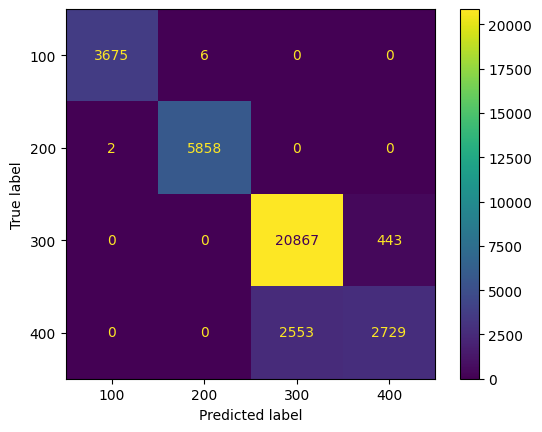

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()


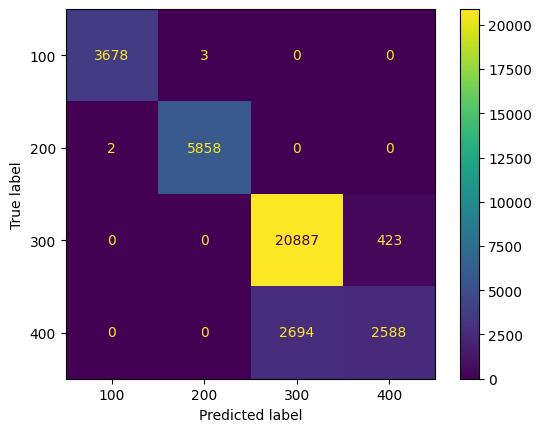

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weights_dict = {((i+1)*100) : class_weights[i] for i in range(len(class_weights))}
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = class_weights_dict)
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3678     3     0     0]
 [    2  5858     0     0]
 [    0     0 20887   423]
 [    0     0  2694  2588]]


{0: 2.428732271291255,
 1: 1.5124424445374633,
 2: 0.42652040984961165,
 3: 1.7166595400988218}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00      3681
         200       1.00      1.00      1.00      5860
         300       0.89      0.98      0.93     21310
         400       0.86      0.49      0.62      5282

    accuracy                           0.91     36133
   macro avg       0.94      0.87      0.89     36133
weighted avg       0.91      0.91      0.90     36133



0.9135969889021116

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train,y_train)
BernoulliNB()
y_pred= clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print('test accuracy:', accuracy_score(y_test, y_pred))


test accuracy: 0.7509755625051892


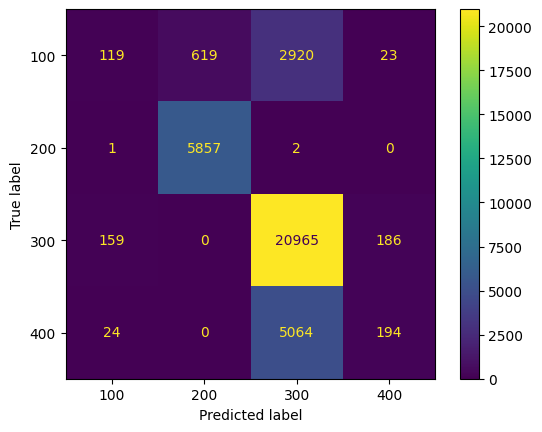

In [ ]:

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8634766003376415

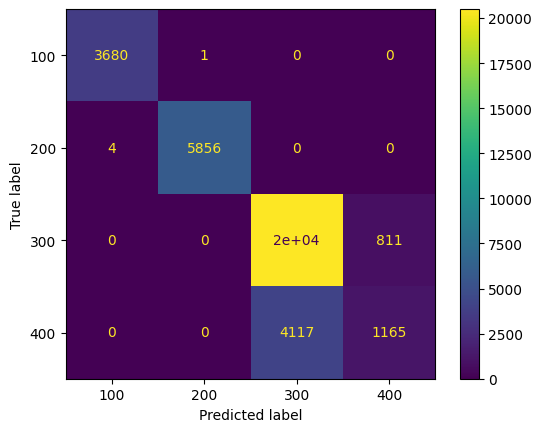

In [ ]:

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))
mean_squared_error(y_test,y_pred)

              precision    recall  f1-score   support

         100       0.39      0.03      0.06      3681
         200       0.90      1.00      0.95      5860
         300       0.72      0.98      0.83     21310
         400       0.48      0.04      0.07      5282

    accuracy                           0.75     36133
   macro avg       0.63      0.51      0.48     36133
weighted avg       0.68      0.75      0.66     36133



5150.693272078156

In [ ]:
#so we need to balance the number of samples (???oversampling/undersampling/smo)

In [ ]:
df.fin.value_counts()

300    106024
200     29750
400     26330
100     18558
Name: fin, dtype: int64

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [ ]:
class_weights

array([2.42873227, 1.51244244, 0.42652041, 1.71665954])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8634766003376415

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# define the hyperparameter grid
param_grid = {
    'n_estimators': [80, 100, 120],
    'learning_rate': [0.9, 1.0, 1.2],
    'max_depth': [1, 2, 3],
}

# create the GridSearchCV object
gbm_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose = 2
)

# fit the GridSearchCV object to the data
gbm_grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters:", gbm_grid.best_params_)

# calculate the f1 score on the test set using the best estimator
y_pred = gbm_grid.best_estimator_.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set f1 score: {:.3f}".format(f1))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  46.8s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  46.3s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  47.0s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  46.5s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  47.2s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  58.5s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  58.1s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  57.5s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time= 1.0min
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  58.0s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=120; total time= 1.2min
[CV] END ...learning_rate=0.9, max_depth=1, n_e